In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') ### Does not dispaly the warnings

In [146]:
rain=pd.read_csv('Rain Prediction Train.csv')
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,07-02-2014,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,76.0,66.0,1017.3,1016.5,7.0,4.0,21.5,24.2,Yes,No
1,23-04-2009,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,65.0,37.0,1014.0,1008.8,7.0,8.0,14.0,21.8,No,Yes
2,08-11-2015,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,71.0,28.0,1022.5,1019.4,2.0,7.0,12.8,23.6,No,No
3,21-11-2012,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,...,65.0,76.0,1017.0,1010.6,NaN,NaN,18.9,20.6,No,No
4,30-07-2013,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,61.0,46.0,1016.8,1011.8,1.0,1.0,21.7,25.6,No,No


In [147]:
rain.shape

(100000, 23)

In [148]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
Date             100000 non-null object
Location         100000 non-null object
MinTemp          99564 non-null float64
MaxTemp          99784 non-null float64
Rainfall         99030 non-null float64
Evaporation      57367 non-null float64
Sunshine         52518 non-null float64
WindGustDir      93419 non-null object
WindGustSpeed    93460 non-null float64
WindDir9am       92938 non-null object
WindDir3pm       97309 non-null object
WindSpeed9am     99062 non-null float64
WindSpeed3pm     98146 non-null float64
Humidity9am      98762 non-null float64
Humidity3pm      97456 non-null float64
Pressure9am      90163 non-null float64
Pressure3pm      90188 non-null float64
Cloud9am         62372 non-null float64
Cloud3pm         59989 non-null float64
Temp9am          99380 non-null float64
Temp3pm          98090 non-null float64
RainToday        99030 non-null object
RainTomorrow  

In [149]:
(rain.isna().sum()/len(rain)).round(2)

Date             0.00
Location         0.00
MinTemp          0.00
MaxTemp          0.00
Rainfall         0.01
Evaporation      0.43
Sunshine         0.47
WindGustDir      0.07
WindGustSpeed    0.07
WindDir9am       0.07
WindDir3pm       0.03
WindSpeed9am     0.01
WindSpeed3pm     0.02
Humidity9am      0.01
Humidity3pm      0.03
Pressure9am      0.10
Pressure3pm      0.10
Cloud9am         0.38
Cloud3pm         0.40
Temp9am          0.01
Temp3pm          0.02
RainToday        0.01
RainTomorrow     0.00
dtype: float64

## columns like cloud 9am,cloud 3pm,evaporation,sunshine contains more percent of null values..

In [150]:
rain.groupby('Location')['MaxTemp'].mean().sort_values(ascending=False)

Location
Katherine           34.892421
Darwin              32.545000
Uluru               30.321311
Cairns              29.534017
Townsville          29.403671
AliceSprings        29.193401
Moree               26.919723
Woomera             26.570167
Brisbane            26.430405
PearceRAAF          26.175684
Cobar               26.011090
GoldCoast           25.795380
PerthAirport        25.519660
Perth               25.114342
Mildura             24.945575
Penrith             24.670239
Richmond            24.368916
SalmonGums          24.328130
Williamtown         24.268409
Newcastle           24.130106
BadgerysCreek       23.997482
CoffsHarbour        23.907273
SydneyAirport       23.385815
Adelaide            23.056803
Sydney              23.002564
WaggaWagga          22.928883
NorahHead           22.635442
Albury              22.533542
Nhil                22.318042
NorfolkIsland       21.790000
Witchcliffe         21.707871
Nuriootpa           21.584604
Wollongong          21.563717
B

In [151]:
rain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,99564.000000,99784.000000,99030.000000,57367.000000,52518.000000,93460.000000,99062.000000,98146.000000,98762.000000,97456.000000,90163.000000,90188.000000,62372.000000,59989.000000,99380.000000,98090.000000
mean,12.190559,23.228404,2.346882,5.467535,7.627004,39.986818,14.008045,18.623846,68.845599,51.491155,1017.631809,1015.242128,4.432261,4.502492,16.986879,21.685637
std,6.412850,7.117851,8.357515,4.186620,3.783709,13.589459,8.898406,8.797918,19.064754,20.824180,7.105450,7.032167,2.887452,2.721770,6.500404,6.940969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.900000,28.200000,0.600000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,47.300000,278.400000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,39.400000,46.700000


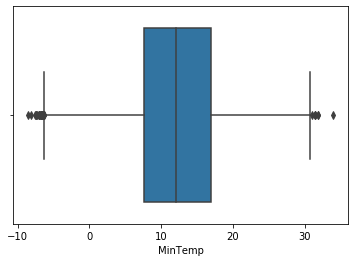

In [152]:
sns.boxplot(rain['MinTemp'])


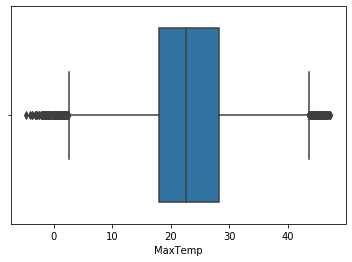

In [153]:
sns.boxplot(rain['MaxTemp'])

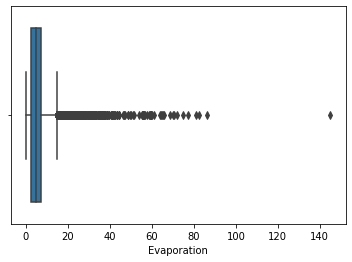

In [154]:
sns.boxplot(rain['Evaporation'])

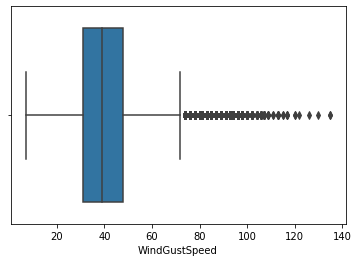

In [155]:
sns.boxplot(rain['WindGustSpeed'])

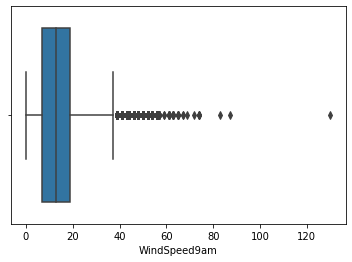

In [156]:
sns.boxplot(rain['WindSpeed9am'])

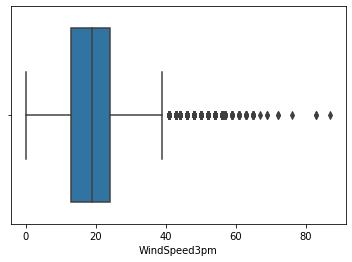

In [157]:
sns.boxplot(rain['WindSpeed3pm'])

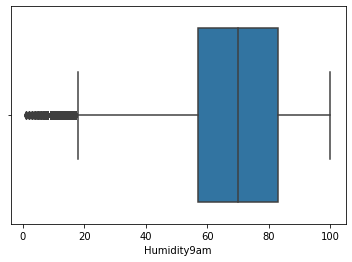

In [158]:
sns.boxplot(rain['Humidity9am'])

## many columns have outliers high in number ,so i am treating outliers  by cappping method

In [159]:
rain_num=rain._get_numeric_data()

In [160]:
for i in rain_num.columns:
    q1=rain_num[i].quantile(0.25)
    q3=rain_num[i].quantile(0.75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    
    rain[i]=rain[i].replace(rain[rain[i]>ub][i],rain[i].quantile(0.99))
    rain[i]=rain[i].replace(rain[rain[i]<lb][i],rain[i].quantile(0.01))
    

### outliers have been removed 

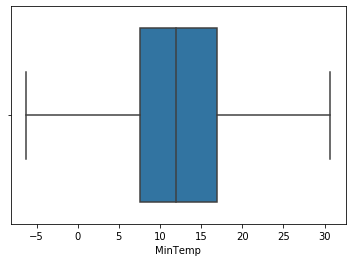

In [161]:
sns.boxplot(rain['MinTemp'])

## filling null values

In [162]:
rain['WindSpeed3pm'].mean()


18.57972816008803

In [163]:
rain['WindSpeed9am'].mean()

13.941541660778098

In [164]:
rain['WindSpeed9am']=rain['WindSpeed9am'].fillna(13.941)
rain['WindSpeed3pm']=rain['WindSpeed3pm'].fillna(18.579)

In [165]:
rain['Temp9am']=rain['Temp9am'].fillna(rain['Temp9am'].mean())
rain['Temp3pm']=rain['Temp3pm'].fillna(rain['Temp3pm'].mean())

In [166]:
rain['Humidity3pm']=rain['Humidity3pm'].fillna(rain['Humidity3pm'].mode()[0])
rain['Humidity9am']=rain['Humidity9am'].fillna(rain['Humidity9am'].mode()[0])

### 1.	Find the windy (Highest wind speed and frequent high-speed winds) places to build a windmill. Also find the sunny places to setup a solar field. Take values more than 75 percentile as minimum values for analysis.

In [167]:
rain['Avg_wind_speed']=(rain['WindSpeed9am']+rain['WindSpeed9am'])/2

In [168]:
rain.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Avg_wind_speed
0,07-02-2014,CoffsHarbour,17.7,25.9,37.8,1.6,NaN,NNE,31.0,SW,...,66.0,1017.3,1016.5,7.0,4.0,21.5,24.2,Yes,No,7.0
1,23-04-2009,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,37.0,1014.0,1008.8,7.0,8.0,14.0,21.8,No,Yes,13.0


In [169]:
places=rain[rain['Avg_wind_speed']>rain['Avg_wind_speed'].quantile(0.75)]['Location'].value_counts().sort_values(ascending=False).reset_index()
places.head()
places.columns=['Locations','value_counts']
places

,Locations,value_counts
0,Ballarat,1130
1,Woomera,1067
2,NorfolkIsland,1062
3,MelbourneAirport,959
4,GoldCoast,888
5,PerthAirport,865
6,Moree,797
7,MountGambier,776
8,SydneyAirport,747
9,Melbourne,747


### Ans. Ballarat,woomera,Norfolkisland,Melbourne Airport,Gold coast are top cities where there are constant high speed winds

In [170]:
sunny_places=rain.groupby('Location')['MaxTemp'].mean().sort_values(ascending=False).reset_index()
sunny_places.colums=['location','Value_counts']
sunny_places

,Location,MaxTemp
0,Katherine,34.892421
1,Darwin,32.545000
2,Uluru,30.303825
3,Cairns,29.534017
4,Townsville,29.403671
5,AliceSprings,29.185930
6,Moree,26.910727
7,Woomera,26.522959
8,Brisbane,26.430405
9,PearceRAAF,26.166701


### Ans:Katherine,Darwin,Uluru,Cairns,TownsVille,Alice are the most sunny places

## 2.	Find the locations where humidity and temperature are more than 80 percentile value.

In [171]:
rain['avg_humidity']=(rain['Humidity9am']+rain['Humidity3pm'])/2

In [172]:
rain['avg_temp']=(rain['Temp9am']+rain['Temp3pm'])/2

In [173]:
rain[['avg_humidity','avg_temp']].quantile(0.80)

avg_humidity    76.00
avg_temp        25.05
Name: 0.8, dtype: float64

In [174]:
locations=rain[(rain['avg_humidity']>76.0)&(rain['avg_temp']>25.05)]['Location'].value_counts().sort_values(ascending=False).reset_index()
locations.columns=['Locations','Value_counts']
locations

,Locations,Value_counts
0,Darwin,280
1,Cairns,266
2,Townsville,153
3,GoldCoast,88
4,Katherine,60
5,NorahHead,34
6,Brisbane,27
7,NorfolkIsland,23
8,CoffsHarbour,18
9,Penrith,15


### Ans: Above locations are where humidity and temperature are greater than 80 percentile value

## 3.	Find 3 places where rainfall, sunshine, humidity is not too high or too low[ Use logical threshold using percentile values]

In [175]:
rain[['Rainfall','Sunshine','avg_humidity']].quantile([0.40,0.70])

,Rainfall,Sunshine,avg_humidity
0.4,0.0,7.2,57.0
0.7,0.2,10.3,70.5


In [239]:
ma=rain[rain['Rainfall']>0.0][rain['Sunshine']>7.2][rain['avg_humidity']>57.0]

In [240]:
ra=ma[ma['Rainfall']<0.4][ma['Sunshine']<10.3][ma['avg_humidity']<70.0]['Location'].value_counts().sort_values(ascending=False)

In [241]:
ra

NorfolkIsland       35
Brisbane            32
Nuriootpa           24
Watsonia            24
Sale                24
Hobart              21
Sydney              20
Portland            19
Perth               19
MountGambier        18
Townsville          16
MelbourneAirport    15
Cairns              13
Moree               12
Albany              12
PearceRAAF           9
Williamtown          9
SydneyAirport        9
WaggaWagga           9
Adelaide             9
Canberra             9
Dartmoor             8
Mildura              8
Darwin               8
Woomera              8
Melbourne            7
PerthAirport         6
Cobar                3
AliceSprings         2
CoffsHarbour         1
Name: Location, dtype: int64

### Ans:  3 places where rainfall, sunshine, humidity is not too high or too low are Norfolkisland,Brisbane,Nuriootpa

In [242]:
rain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud3pm,Temp9am,Temp3pm,Avg_wind_speed,avg_humidity,avg_temp,avg_cloud,month,Day,avg_tmp1
count,99564.000000,99784.000000,100000.000000,57367.000000,52518.000000,93460.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,12.191626,23.241377,7.725347,5.411766,7.627004,39.958742,13.941537,18.579715,69.262080,51.504100,...,4.502492,16.990344,21.696247,13.941537,60.383090,19.343296,4.467377,6.43377,15.686730,19.343296
std,6.407890,7.054110,15.065390,3.694490,3.783709,13.443471,8.619093,8.559009,19.111559,20.557744,...,2.108073,6.453515,6.792841,8.619093,18.044103,6.363566,1.939268,3.43824,8.852709,6.363566
min,-6.300000,2.500000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,17.000000,0.000000,...,0.000000,-1.600000,2.000000,0.000000,8.500000,0.350000,0.000000,1.00000,1.000000,0.350000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,...,4.000000,12.300000,16.700000,7.000000,49.000000,14.600000,3.716131,3.00000,8.000000,14.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,18.579000,70.000000,52.000000,...,4.502492,16.800000,21.300000,13.000000,61.500000,19.000000,4.467377,6.00000,16.000000,19.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,84.000000,65.000000,...,6.000000,21.600000,26.300000,19.000000,73.500000,23.850000,5.716131,9.00000,23.000000,23.850000
max,30.700000,43.600000,37.800000,18.400000,14.500000,81.000000,39.000000,43.000000,100.000000,100.000000,...,9.000000,35.500000,41.000000,39.000000,100.000000,38.100000,8.000000,12.00000,31.000000,38.100000


In [243]:
rain[['Rainfall','Sunshine','avg_humidity']].median()

Rainfall         0.0
Sunshine         8.5
avg_humidity    61.5
dtype: float64

In [244]:
rain['Cloud9am']=rain['Cloud9am'].fillna(rain['Cloud9am'].mean())

In [245]:
rain['Cloud3pm']=rain['Cloud3pm'].fillna(rain['Cloud3pm'].mean())

In [246]:
rain['avg_cloud']=(rain['Cloud9am']+rain['Cloud3pm'])/2

## 4.	Find the top 3 places where rainfall is high, but cloud cover is low and vice versa. Take cloud cover avg>5.

In [247]:
rain['avg_cloud'].mean()

4.467376697321717

In [248]:
a=rain.groupby('Location').agg({'Rainfall':'max','avg_cloud':'max'}).reset_index().sort_values(by='avg_cloud',ascending=False)

In [249]:
a[a['avg_cloud']>5]

,Location,Rainfall,avg_cloud
24,Newcastle,37.8,8.0
21,Moree,37.8,8.0
1,Albany,37.8,8.0
27,NorfolkIsland,37.8,8.0
28,Nuriootpa,37.8,8.0
29,PearceRAAF,37.8,8.0
31,Perth,37.8,8.0
32,PerthAirport,37.8,8.0
33,Portland,37.8,8.0
34,Richmond,37.8,8.0


In [250]:
b=rain.groupby('Location').agg({'Rainfall':'max','avg_cloud':'min'}).reset_index().sort_values(by='avg_cloud',ascending=False)
b

,Location,Rainfall,avg_cloud
0,Adelaide,37.8,4.467377
43,Walpole,37.8,4.467377
26,NorahHead,37.8,4.467377
25,Nhil,37.8,4.467377
23,MountGinini,37.8,4.467377
36,SalmonGums,37.8,4.467377
40,Tuggeranong,37.8,4.467377
12,Dartmoor,37.8,4.467377
14,GoldCoast,37.8,4.467377
30,Penrith,37.8,4.467377


In [251]:
#rain.groupby('Location')['Rainfall'].max()

In [252]:
rain.groupby('Location')['avg_cloud'].mean()

Location
Adelaide            4.467377
Albany              4.964365
Albury              5.107922
AliceSprings        3.181644
BadgerysCreek       4.467377
Ballarat            5.646963
Bendigo             4.628088
Brisbane            3.913729
Cairns              4.519115
Canberra            4.725147
Cobar               3.638639
CoffsHarbour        4.441317
Dartmoor            4.467377
Darwin              4.281967
GoldCoast           4.467377
Hobart              4.747248
Katherine           3.186112
Launceston          4.828094
Melbourne           5.109625
MelbourneAirport    5.230044
Mildura             3.613067
Moree               3.729777
MountGambier        5.480586
MountGinini         4.467377
Newcastle           4.208189
Nhil                4.467377
NorahHead           4.467377
NorfolkIsland       4.898490
Nuriootpa           4.737355
PearceRAAF          4.087604
Penrith             4.467377
Perth               3.414827
PerthAirport        3.451530
Portland            5.953553
Richm

In [253]:
rain.keys()

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Avg_wind_speed',
       'avg_humidity', 'avg_temp', 'avg_cloud', 'month', 'Day', 'avg_tmp1'],
      dtype='object')

## 5.Which wind direction causes rains in which cities ?

In [254]:
rain.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,Avg_wind_speed,avg_humidity,avg_temp,avg_cloud,month,Day,avg_tmp1
0,2014-07-02,CoffsHarbour,17.7,25.9,37.8,1.6,NaN,NNE,31.0,SW,...,24.2,Yes,No,7.0,71.0,22.85,5.5,7,2,22.85
1,2009-04-23,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,21.8,No,Yes,13.0,51.0,17.90,7.5,4,23,17.90
2,2015-08-11,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,23.6,No,No,7.0,49.5,18.20,4.5,8,11,18.20


In [255]:
rain['WindDir9am']=rain['WindDir9am'].fillna(rain['WindDir9am'].mode()[0])
rain['WindDir3pm']=rain['WindDir3pm'].fillna(rain['WindDir3pm'].mode()[0])

In [256]:
a=rain.groupby(['WindGustDir','WindDir9am','WindDir3pm'])['Rainfall'].max()
a=a.reset_index()
a

,WindGustDir,WindDir9am,WindDir3pm,Rainfall
0,E,E,E,37.800000
1,E,E,ENE,37.800000
2,E,E,ESE,37.800000
3,E,E,N,7.725347
4,E,E,NE,37.800000
5,E,E,NNE,37.800000
6,E,E,NNW,37.800000
7,E,E,NW,37.800000
8,E,E,S,37.800000
9,E,E,SE,37.800000


In [257]:
f=rain[(rain['RainToday']=='Yes')|(rain['RainTomorrow']=='Yes')][['WindDir9am','WindDir3pm','WindGustDir','Location']]
f

,WindDir9am,WindDir3pm,WindGustDir,Location
0,SW,ESE,NNE,CoffsHarbour
1,NE,NNE,NNE,Portland
5,N,SE,NaN,Albany
8,S,S,SW,Portland
9,SSW,SSW,SW,Penrith
12,NNE,N,N,Ballarat
13,NE,NNE,NNE,Bendigo
17,N,NW,N,WaggaWagga
18,SW,SW,SSW,Portland
19,ENE,SSW,N,Nuriootpa


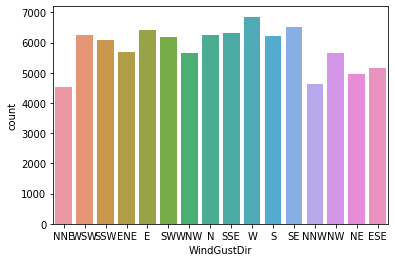

In [258]:
sns.countplot(rain['WindGustDir'])

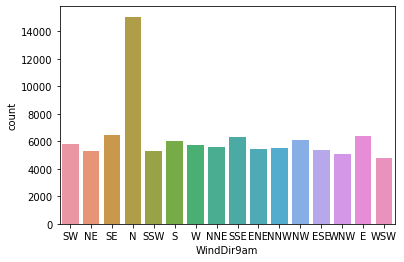

In [259]:
sns.countplot(rain['WindDir9am'])

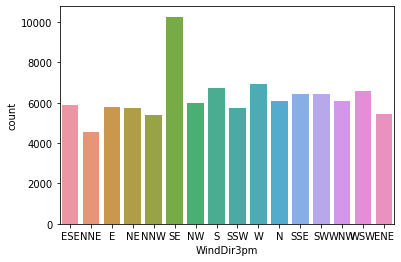

In [260]:
sns.countplot(rain['WindDir3pm'])

## 6.	Find top 5 coastal cities in which evaporation is higher than mean so that we can choose these places for salt preparation plants?

In [261]:
rain['Evaporation'].mean()

5.411766346505859

In [262]:
coastal=rain[rain['Evaporation']>rain['Evaporation'].mean()]['Location'].value_counts().sort_values(ascending=False).reset_index()
coastal.columns=['Cities','value_counts']
coastal

,Cities,value_counts
0,Townsville,1556
1,Darwin,1507
2,AliceSprings,1405
3,Woomera,1207
4,Cairns,1078
5,Brisbane,1029
6,Perth,1021
7,Mildura,971
8,PerthAirport,954
9,Sydney,943


## 7.	Suggest a strategy to a winter goods company to choose the location and months to promote their products. 

In [263]:
import datetime

In [264]:
rain['Date']=pd.to_datetime(rain['Date'])

In [265]:
rain['month']=rain['Date'].dt.month

In [266]:
rain['Day']=rain['Date'].dt.day

In [267]:
rain['MinTemp'].mean()

12.191626491502856

In [268]:
rain['Evaporation'].mean()

5.411766346505859

### in winter season in australia the mean temperatures are around 17,humidity is around 35-40

In [269]:
a=rain[rain['avg_temp']<17][rain['avg_humidity']<35][rain['Sunshine']<6][['month','Location']]
a=a.reset_index(drop=True)
a

,month,Location
0,10,Mildura
1,5,Nuriootpa
2,11,Melbourne
3,8,AliceSprings
4,7,Woomera
5,6,AliceSprings
6,3,MountGambier
7,10,AliceSprings
8,5,Nuriootpa
9,8,Mildura


In [270]:
rain['Sunshine'].describe()

count    52518.000000
mean         7.627004
std          3.783709
min          0.000000
25%          4.900000
50%          8.500000
75%         10.600000
max         14.500000
Name: Sunshine, dtype: float64

In [271]:
rain['avg_tmp1']=(rain['Temp9am']+rain['Temp3pm'])/2

In [272]:
rain['avg_temp'].describe()

count    100000.000000
mean         19.343296
std           6.363566
min           0.350000
25%          14.600000
50%          19.000000
75%          23.850000
max          38.100000
Name: avg_temp, dtype: float64

In [273]:
rain['avg_humidity'].describe()

count    100000.000000
mean         60.383090
std          18.044103
min           8.500000
25%          49.000000
50%          61.500000
75%          73.500000
max         100.000000
Name: avg_humidity, dtype: float64

In [274]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,Avg_wind_speed,avg_humidity,avg_temp,avg_cloud,month,Day,avg_tmp1
0,2014-07-02,CoffsHarbour,17.7,25.9,37.8,1.6,NaN,NNE,31.0,SW,...,24.2,Yes,No,7.0,71.0,22.85,5.500000,7,2,22.85
1,2009-04-23,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,21.8,No,Yes,13.0,51.0,17.90,7.500000,4,23,17.90
2,2015-08-11,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,23.6,No,No,7.0,49.5,18.20,4.500000,8,11,18.20
3,2012-11-21,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,...,20.6,No,No,13.0,70.5,19.75,4.467377,11,21,19.75
4,2013-07-30,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,25.6,No,No,7.0,53.5,23.65,1.000000,7,30,23.65


## 8.	What factors effect tomorrow rain column the most in weather dataset ?

In [275]:
 rain.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,Avg_wind_speed,avg_humidity,avg_temp,avg_cloud,month,Day,avg_tmp1
0,2014-07-02,CoffsHarbour,17.7,25.9,37.8,1.6,NaN,NNE,31.0,SW,...,24.2,Yes,No,7.0,71.0,22.85,5.5,7,2,22.85
1,2009-04-23,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,21.8,No,Yes,13.0,51.0,17.90,7.5,4,23,17.90
2,2015-08-11,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,23.6,No,No,7.0,49.5,18.20,4.5,8,11,18.20


In [276]:
tomorrow_yes=rain[rain['RainTomorrow']=='Yes']
tomorrow_yes.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,Avg_wind_speed,avg_humidity,avg_temp,avg_cloud,month,Day,avg_tmp1
1,2009-04-23,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,21.800000,No,Yes,13.0,51.0,17.900000,7.500000,4,23,17.900000
5,2016-05-20,Albany,10.1,21.8,0.0,0.8,NaN,NaN,NaN,N,...,21.696247,No,Yes,4.0,72.5,17.298124,2.751246,5,20,17.298124
9,2016-08-07,Penrith,12.5,16.9,0.8,NaN,NaN,SW,26.0,SSW,...,13.100000,No,Yes,7.0,94.0,13.200000,4.467377,8,7,13.200000
12,2012-02-26,Ballarat,20.6,32.3,0.0,NaN,NaN,N,65.0,NNE,...,28.700000,No,Yes,39.0,54.0,26.200000,3.500000,2,26,26.200000
13,2016-10-07,Bendigo,5.6,11.2,0.2,NaN,NaN,NNE,54.0,NE,...,9.300000,No,Yes,15.0,97.0,8.800000,8.000000,10,7,8.800000


In [277]:
tomorrow_yes['WindGustDir'].value_counts().sort_values(ascending=False)

W      1817
N      1688
NW     1628
WNW    1592
WSW    1484
S      1391
SSW    1355
NNW    1352
SW     1249
SE     1228
SSE    1208
NNE    1079
E       962
ENE     938
NE      918
ESE     853
Name: WindGustDir, dtype: int64

In [278]:
fre=pd.crosstab(index=rain['RainTomorrow'],columns=rain['WindGustDir'])

In [279]:
fre

WindGustDir,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
RainTomorrow,,,,,,,,,,,,,,,,
No,5443,4751,4303,4552,4055,3441,3287,4037,4840,5280,5112,4733,4944,5040,4075,4784
Yes,962,938,853,1688,918,1079,1352,1628,1391,1228,1208,1355,1249,1817,1592,1484


In [280]:
from scipy.stats import chi2_contingency

In [281]:
chi2_contingency(fre)

(1083.1177508473388,
 2.0219348251439394e-221,
 15,
 array([[4982.88554791, 4425.86040313, 4011.20341686, 4854.52081482,
         3868.83525835, 3516.41571843, 3608.99391987, 4407.18916923,
         4847.51910211, 5063.01626008, 4916.75826117, 4736.26966677,
         4817.9563151 , 5334.52711975, 4408.74510539, 4876.30392104],
        [1422.11445209, 1263.13959687, 1144.79658314, 1385.47918518,
         1104.16474165, 1003.58428157, 1030.00608013, 1257.81083077,
         1383.48089789, 1444.98373992, 1403.24173883, 1351.73033323,
         1375.0436849 , 1522.47288025, 1258.25489461, 1391.69607896]]))

### null hypothesis is rejected so windGustDir and Rain Tomorrow are Dependent

In [282]:
freq=pd.crosstab(index=rain['RainTomorrow'],columns=rain['WindDir9am'])
freq

WindDir9am,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
RainTomorrow,,,,,,,,,,,,,,,,
No,5400,4449,4582,11260,4198,4082,3756,4348,4791,5377,5195,4086,4450,4234,3700,3597
Yes,964,957,790,3798,1098,1469,1746,1721,1194,1044,1122,1186,1323,1509,1358,1216


In [283]:
chi2_contingency(freq)

(1338.4875074974855,
 2.815323360260615e-276,
 15,
 array([[ 4932.4182 ,  4189.9203 ,  4163.5686 , 11670.7029 ,  4104.6648 ,
          4302.30255,  4264.3251 ,  4703.77845,  4638.67425,  4976.59605,
          4895.99085,  4086.0636 ,  4474.36365,  4451.11215,  3920.2029 ,
          3730.31565],
        [ 1431.5818 ,  1216.0797 ,  1208.4314 ,  3387.2971 ,  1191.3352 ,
          1248.69745,  1237.6749 ,  1365.22155,  1346.32575,  1444.40395,
          1421.00915,  1185.9364 ,  1298.63635,  1291.88785,  1137.7971 ,
          1082.68435]]))

### null hypothesis is rejected so wind Dir 9am and Rain Tomorrow are Dependent

In [284]:
freq=pd.crosstab(index=rain['RainTomorrow'],columns=rain['WindDir3pm'])
freq

WindDir3pm,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
RainTomorrow,,,,,,,,,,,,,,,,
No,4768,4465,4849,4372,4643,3445,3892,4311,5273,8082,5191,4428,5186,5165,4338,5097
Yes,1009,979,1019,1697,1099,1102,1507,1686,1434,2177,1239,1299,1260,1767,1723,1498


In [285]:
chi2_contingency(freq)

(827.6161289491577,
 1.0699424162582923e-166,
 15,
 array([[4477.46385, 4219.3722 , 4547.9934 , 4703.77845, 4450.3371 ,
         3524.15235, 4184.49495, 4647.97485, 5198.26035, 7951.23795,
         4983.5715 , 4438.71135, 4995.9723 , 5372.6466 , 4697.57805,
         5111.45475],
        [1299.53615, 1224.6278 , 1320.0066 , 1365.22155, 1291.6629 ,
         1022.84765, 1214.50505, 1349.02515, 1508.73965, 2307.76205,
         1446.4285 , 1288.28865, 1450.0277 , 1559.3534 , 1363.42195,
         1483.54525]]))

### null hypothesis is rejected so wind Dir 3pm and Rain Tomorrow are Dependent

In [286]:
tomorrow_yes['WindDir9am'].value_counts().sort_values(ascending=False)

N      3798
NNW    1746
NW     1721
W      1509
NNE    1469
WNW    1358
SW     1323
WSW    1216
S      1194
SSW    1186
SSE    1122
NE     1098
SE     1044
E       964
ENE     957
ESE     790
Name: WindDir9am, dtype: int64

In [287]:
tomorrow_yes['WindDir3pm'].value_counts().sort_values(ascending=False)

SE     2177
W      1767
WNW    1723
N      1697
NW     1686
NNW    1507
WSW    1498
S      1434
SSW    1299
SW     1260
SSE    1239
NNE    1102
NE     1099
ESE    1019
E      1009
ENE     979
Name: WindDir3pm, dtype: int64

#### tomorrow no data frame

In [288]:
tomorrow_no=rain[rain['RainTomorrow']=='No']
tomorrow_no.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,Avg_wind_speed,avg_humidity,avg_temp,avg_cloud,month,Day,avg_tmp1
0,2014-07-02,CoffsHarbour,17.7,25.9,37.8,1.6,NaN,NNE,31.0,SW,...,24.2,Yes,No,7.0,71.0,22.85,5.500000,7,2,22.85
2,2015-08-11,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,23.6,No,No,7.0,49.5,18.20,4.500000,8,11,18.20
3,2012-11-21,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,...,20.6,No,No,13.0,70.5,19.75,4.467377,11,21,19.75
4,2013-07-30,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,25.6,No,No,7.0,53.5,23.65,1.000000,7,30,23.65
6,2011-01-20,Sale,12.5,24.7,0.0,6.4,6.6,E,31.0,NE,...,23.1,No,No,11.0,69.0,20.30,5.000000,1,20,20.30


In [289]:
tomorrow_yes.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud3pm,Temp9am,Temp3pm,Avg_wind_speed,avg_humidity,avg_temp,avg_cloud,month,Day,avg_tmp1
count,22376.000000,22461.000000,22495.000000,12638.000000,11934.000000,20759.000000,22495.000000,22495.000000,22495.000000,22495.000000,...,22495.000000,22495.000000,22495.000000,22495.000000,22495.000000,22495.000000,22495.000000,22495.000000,22495.000000,22495.000000
mean,13.199933,21.174351,16.405771,4.492712,4.475306,45.838865,15.382915,19.946422,78.320916,68.247744,...,5.680213,16.697416,19.306451,15.382915,73.284330,18.001934,5.590218,6.410313,15.807780,18.001934
std,6.324195,6.806220,18.494263,3.231313,3.367002,15.350841,9.161993,9.354162,16.143776,19.042743,...,1.793665,6.324209,6.482625,9.161993,15.414761,6.179131,1.623905,3.343544,8.793439,6.179131
min,-6.300000,2.500000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,17.000000,1.000000,...,0.000000,-1.600000,2.000000,0.000000,9.000000,0.850000,0.000000,1.000000,1.000000,0.850000
25%,8.500000,16.100000,0.000000,2.200000,1.400000,35.000000,9.000000,13.000000,68.000000,55.000000,...,4.502492,12.000000,14.500000,9.000000,64.000000,13.250000,4.467377,4.000000,8.000000,13.250000
50%,12.700000,20.300000,0.800000,3.800000,4.300000,44.000000,15.000000,19.000000,81.000000,69.000000,...,5.000000,16.200000,18.600000,15.000000,75.000000,17.450000,5.000000,6.000000,16.000000,17.450000
75%,18.000000,25.900000,37.800000,6.200000,7.100000,56.000000,20.000000,26.000000,92.000000,84.000000,...,7.000000,21.100000,23.400000,20.000000,84.500000,22.250000,7.000000,9.000000,23.000000,22.250000
max,30.700000,43.500000,37.800000,18.400000,13.900000,81.000000,39.000000,43.000000,100.000000,100.000000,...,8.000000,35.500000,41.000000,39.000000,100.000000,37.800000,8.000000,12.000000,31.000000,37.800000


In [290]:
tomorrow_no.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud3pm,Temp9am,Temp3pm,Avg_wind_speed,avg_humidity,avg_temp,avg_cloud,month,Day,avg_tmp1
count,77188.000000,77323.000000,77505.000000,44729.000000,40584.000000,72701.000000,77505.000000,77505.000000,77505.000000,77505.000000,...,77505.000000,77505.000000,77505.00000,77505.000000,77505.000000,77505.000000,77505.000000,77505.000000,77505.000000,77505.000000
mean,11.899329,23.841813,5.205946,5.671441,8.553782,38.279735,13.523192,18.183042,66.632849,46.644436,...,4.160671,17.075363,22.38986,13.523192,56.638643,19.732612,4.141484,6.440578,15.651597,19.732612
std,6.402368,7.011239,12.859020,3.774889,3.378318,12.343245,8.408925,8.271889,19.102152,18.304437,...,2.068973,6.488127,6.72308,8.408925,16.994031,6.363419,1.901262,3.465231,8.869584,6.363419
min,-6.300000,2.500000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,17.000000,0.000000,...,0.000000,-1.600000,2.00000,0.000000,8.500000,0.350000,0.000000,1.000000,1.000000,0.350000
25%,7.300000,18.600000,0.000000,2.800000,6.600000,30.000000,7.000000,13.000000,55.000000,33.000000,...,3.000000,12.400000,17.50000,7.000000,46.000000,15.050000,3.000000,3.000000,8.000000,15.050000
50%,11.800000,23.300000,0.000000,5.000000,9.400000,37.000000,13.000000,17.000000,67.000000,48.000000,...,4.502492,16.900000,21.70000,13.000000,58.000000,19.450000,4.467377,6.000000,16.000000,19.450000
75%,16.600000,28.800000,0.200000,7.600000,11.000000,44.000000,19.000000,24.000000,80.000000,59.000000,...,5.000000,21.700000,27.00000,19.000000,68.500000,24.200000,5.000000,9.000000,23.000000,24.200000
max,30.700000,43.600000,37.800000,18.400000,14.500000,81.000000,39.000000,43.000000,100.000000,100.000000,...,9.000000,35.500000,41.00000,39.000000,100.000000,38.100000,8.000000,12.000000,31.000000,38.100000


####  sunshine and humidity vary a lot in tomorrow yes and tomorrow rain data frames

### #factors_affecting=sunshine,wind_gustspeed,humidity,wind Gust Dir,Winspeeds at 9am,3pm

### 9.	Create a new column as rainfall level with values as no, low, medium, high, heavy as categories and do the bivariate analyses between rainfall level and wind direction 
#### no rain    ------> 0 percentile
#### low --------->0-25 percentile
#### medium--------->25-50 percentile
#### high--------->50-75 percentile
#### heavy--------->75-100 percentile


In [291]:
no_rain=rain['Rainfall'].quantile(0.0)
no_rain

0.0

In [292]:
low_rain=rain['Rainfall'].quantile(0.25)
low_rain

0.0

In [293]:
medium_rain=rain['Rainfall'].quantile(0.50)
medium_rain

0.0

In [294]:
high_rain=rain['Rainfall'].quantile(0.75)
high_rain

0.8

In [295]:
heavy=rain['Rainfall'].quantile(1.0)
heavy

37.8

## no_rain

In [296]:
NO_rain=rain[rain['Rainfall']==0]['Rainfall']
NO_rain

1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
10       0.0
11       0.0
12       0.0
14       0.0
15       0.0
16       0.0
19       0.0
21       0.0
22       0.0
23       0.0
25       0.0
26       0.0
27       0.0
28       0.0
30       0.0
31       0.0
32       0.0
33       0.0
34       0.0
36       0.0
38       0.0
39       0.0
40       0.0
        ... 
99955    0.0
99956    0.0
99957    0.0
99958    0.0
99963    0.0
99964    0.0
99965    0.0
99969    0.0
99970    0.0
99971    0.0
99974    0.0
99978    0.0
99979    0.0
99980    0.0
99981    0.0
99982    0.0
99983    0.0
99984    0.0
99986    0.0
99988    0.0
99989    0.0
99990    0.0
99991    0.0
99992    0.0
99993    0.0
99994    0.0
99995    0.0
99996    0.0
99997    0.0
99999    0.0
Name: Rainfall, Length: 63506, dtype: float64

## low_rain

In [297]:
LOW_rain=rain[rain['Rainfall']==0]['Rainfall']
LOW_rain

1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
10       0.0
11       0.0
12       0.0
14       0.0
15       0.0
16       0.0
19       0.0
21       0.0
22       0.0
23       0.0
25       0.0
26       0.0
27       0.0
28       0.0
30       0.0
31       0.0
32       0.0
33       0.0
34       0.0
36       0.0
38       0.0
39       0.0
40       0.0
        ... 
99955    0.0
99956    0.0
99957    0.0
99958    0.0
99963    0.0
99964    0.0
99965    0.0
99969    0.0
99970    0.0
99971    0.0
99974    0.0
99978    0.0
99979    0.0
99980    0.0
99981    0.0
99982    0.0
99983    0.0
99984    0.0
99986    0.0
99988    0.0
99989    0.0
99990    0.0
99991    0.0
99992    0.0
99993    0.0
99994    0.0
99995    0.0
99996    0.0
99997    0.0
99999    0.0
Name: Rainfall, Length: 63506, dtype: float64

## high rain

In [298]:
HIGH=rain[(rain['Rainfall']>0.0)&(rain['Rainfall']<=0.8)]['Rainfall']
HIGH


9        0.8
13       0.2
29       0.6
35       0.2
42       0.2
45       0.4
47       0.2
51       0.2
60       0.1
62       0.2
74       0.2
75       0.8
83       0.8
94       0.4
99       0.8
112      0.2
134      0.4
137      0.4
164      0.4
181      0.1
196      0.2
197      0.4
200      0.4
203      0.2
221      0.6
226      0.8
241      0.2
245      0.2
249      0.2
266      0.6
        ... 
99778    0.2
99781    0.2
99793    0.4
99820    0.2
99821    0.8
99823    0.2
99824    0.6
99825    0.8
99835    0.2
99836    0.2
99839    0.8
99847    0.2
99848    0.6
99861    0.6
99867    0.4
99888    0.4
99893    0.4
99897    0.8
99898    0.2
99912    0.4
99921    0.4
99922    0.2
99927    0.2
99930    0.4
99960    0.8
99968    0.8
99972    0.4
99975    0.2
99985    0.2
99998    0.8
Name: Rainfall, Length: 12268, dtype: float64

### Heavy rain

In [299]:
HEAVY=rain[(rain['Rainfall']>0.8)&(rain['Rainfall']<=37.8)]['Rainfall']
HEAVY

0        37.800000
8        37.800000
17       37.800000
18       37.800000
20       37.800000
24       37.800000
37        7.725347
48       37.800000
50        1.400000
52       37.800000
55       37.800000
57       37.800000
58       37.800000
63       37.800000
65       37.800000
68       37.800000
76       37.800000
78       37.800000
84       37.800000
88       37.800000
90        7.725347
95       37.800000
102      37.800000
107       1.200000
110      37.800000
114      37.800000
116      37.800000
117      37.800000
129      37.800000
131       7.725347
           ...    
99885    37.800000
99887    37.800000
99889    37.800000
99891    37.800000
99892     1.400000
99895    37.800000
99896    37.800000
99904    37.800000
99907    37.800000
99908     1.000000
99910    37.800000
99914    37.800000
99917    37.800000
99923    37.800000
99928    37.800000
99932    37.800000
99941    37.800000
99942     1.400000
99945    37.800000
99947     7.725347
99950    37.800000
99959    37.

## Bivariate analysis between rainfall level and wind direction

In [300]:
rain.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,Avg_wind_speed,avg_humidity,avg_temp,avg_cloud,month,Day,avg_tmp1
0,2014-07-02,CoffsHarbour,17.7,25.9,37.8,1.6,NaN,NNE,31.0,SW,...,24.2,Yes,No,7.0,71.0,22.85,5.500000,7,2,22.85
1,2009-04-23,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,21.8,No,Yes,13.0,51.0,17.90,7.500000,4,23,17.90
2,2015-08-11,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,23.6,No,No,7.0,49.5,18.20,4.500000,8,11,18.20
3,2012-11-21,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,...,20.6,No,No,13.0,70.5,19.75,4.467377,11,21,19.75
4,2013-07-30,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,25.6,No,No,7.0,53.5,23.65,1.000000,7,30,23.65


In [301]:
from scipy.stats import chi2_contingency

In [302]:
freq=pd.crosstab(index=rain['RainToday'],columns=rain['WindGustDir'])
freq

WindGustDir,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
RainToday,,,,,,,,,,,,,,,,
No,5416,4816,4204,5238,4276,3842,3702,4336,4480,5175,4859,4312,4393,4729,4046,4353
Yes,925,826,914,933,657,632,900,1292,1684,1287,1406,1722,1729,2076,1547,1854


In [303]:
chi2_contingency(freq)

(2021.8249931969474,
 0.0,
 15,
 array([[4944.57014293, 4399.5055585 , 3990.90206458, 4812.00794071,
         3846.64319746, 3488.72525146, 3588.53679195, 4388.58867125,
         4806.54949709, 5038.92323981, 4885.30704076, 4705.17840127,
         4773.79883536, 5306.38697724, 4361.29645315, 4840.07993647],
        [1396.42985707, 1242.4944415 , 1127.09793542, 1358.99205929,
         1086.35680254,  985.27474854, 1013.46320805, 1239.41132875,
         1357.45050291, 1423.07676019, 1379.69295924, 1328.82159873,
         1348.20116464, 1498.61302276, 1231.70354685, 1366.92006353]]))

In [304]:
freq=pd.crosstab(index=rain['RainToday'],columns=rain['WindDir9am'])
freq

WindDir9am,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
RainToday,,,,,,,,,,,,,,,,
No,5581,4711,4605,12087,4535,4755,4058,4442,4272,5271,4901,3587,3739,3833,3533,3063
Yes,746,650,742,2635,723,755,1403,1573,1667,1112,1376,1652,1976,1875,1460,1712


In [305]:
chi2_contingency(freq)

(3623.5316524536315,
 0.0,
 15,
 array([[ 4917.7842169 ,  4166.9418661 ,  4156.0600929 , 11442.96178936,
          4086.88310613,  4282.75502373,  4244.66881753,  4675.27612845,
          4616.20364536,  4961.3113097 ,  4878.92074119,  4072.11498536,
          4442.09527416,  4436.65438756,  3880.90668484,  3711.46193073],
        [ 1409.2157831 ,  1194.0581339 ,  1190.9399071 ,  3279.03821064,
          1171.11689387,  1227.24497627,  1216.33118247,  1339.72387155,
          1322.79635464,  1421.6886903 ,  1398.07925881,  1166.88501464,
          1272.90472584,  1271.34561244,  1112.09331516,  1063.53806927]]))

In [306]:
freq=pd.crosstab(index=rain['RainToday'],columns=rain['WindDir3pm'])
freq

WindDir3pm,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
RainToday,,,,,,,,,,,,,,,,
No,4760,4595,4804,5095,4924,3875,4411,4635,4869,7833,4842,3965,4584,4837,4340,4604
Yes,968,799,1014,925,775,621,940,1310,1758,2301,1514,1718,1808,2029,1662,1915


In [307]:
chi2_contingency(freq)

(1938.3106209307998,
 0.0,
 15,
 array([[4452.19977785, 4192.59176007, 4522.15403413, 4679.16247602,
         4429.65896193, 3494.60373624, 4159.16917096, 4620.86726245,
         5150.96507119, 7876.8492578 , 4940.32503282, 4417.2226497 ,
         4968.30673533, 5336.73248511, 4665.17162476, 5067.01996365],
        [1275.80022215, 1201.40823993, 1295.84596587, 1340.83752398,
         1269.34103807, 1001.39626376, 1191.83082904, 1324.13273755,
         1476.03492881, 2257.1507422 , 1415.67496718, 1265.7773503 ,
         1423.69326467, 1529.26751489, 1336.82837524, 1451.98003635]]))

#### raintoday column depends on wind directions like windGustDir,WindDir at 9am and 3pm which is same as in the case of Rain tomorrow column

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

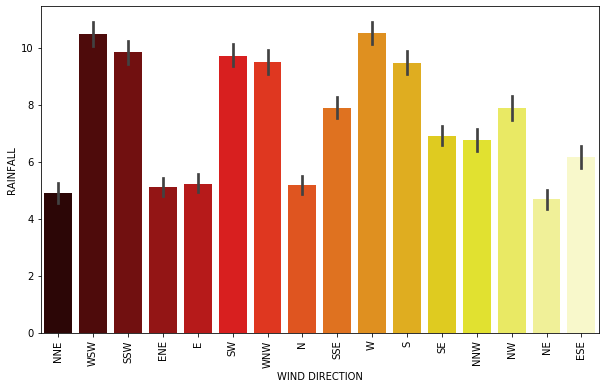

In [308]:
plt.figure(figsize=(10,6))

sns.barplot(rain['WindGustDir'],rain['Rainfall'],palette='hot')
plt.xlabel('WIND DIRECTION')
plt.ylabel('RAINFALL')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

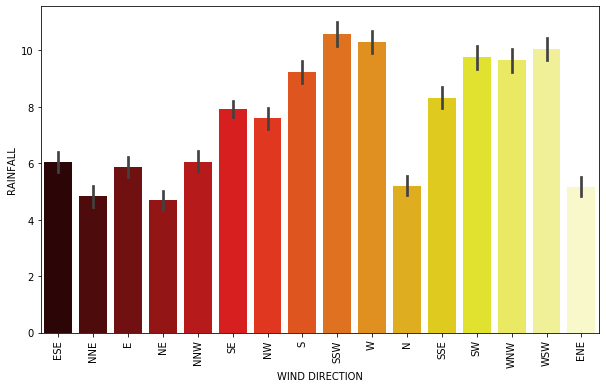

In [309]:
plt.figure(figsize=(10,6))

sns.barplot(rain['WindDir3pm'],rain['Rainfall'],palette='hot')
plt.xlabel('WIND DIRECTION')
plt.ylabel('RAINFALL')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

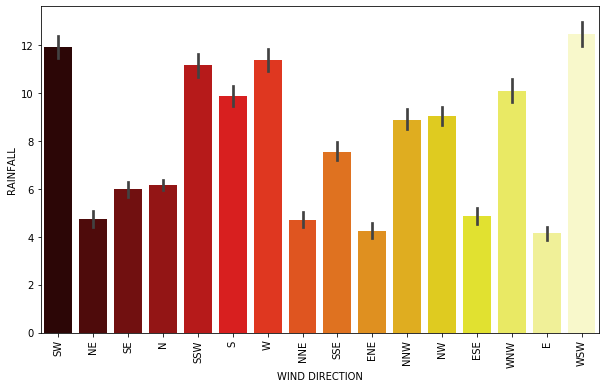

In [310]:
plt.figure(figsize=(10,6))

sns.barplot(rain['WindDir9am'],rain['Rainfall'],palette='hot')
plt.xlabel('WIND DIRECTION')
plt.ylabel('RAINFALL')
plt.xticks(rotation=90)

### as we performed chi square test on rain tomorrow and rain today column and wind directions at different times,,the chi square test clearly shows that rain column and wind directions are Dependent.From this we can say that Rainfall and wind directions are dependent as Rainfall relates with Rain today and rain tomorrow columns


In [311]:
rain.keys()

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Avg_wind_speed',
       'avg_humidity', 'avg_temp', 'avg_cloud', 'month', 'Day', 'avg_tmp1'],
      dtype='object')

## # 10.	Plot the correlation heatmap between the numerical variables.

In [312]:
rain.keys()

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Avg_wind_speed',
       'avg_humidity', 'avg_temp', 'avg_cloud', 'month', 'Day', 'avg_tmp1'],
      dtype='object')

In [313]:
rain_corr=rain.drop(['avg_humidity', 'avg_temp', 'avg_cloud', 'month', 'Day', 'avg_tmp1'],axis=1)

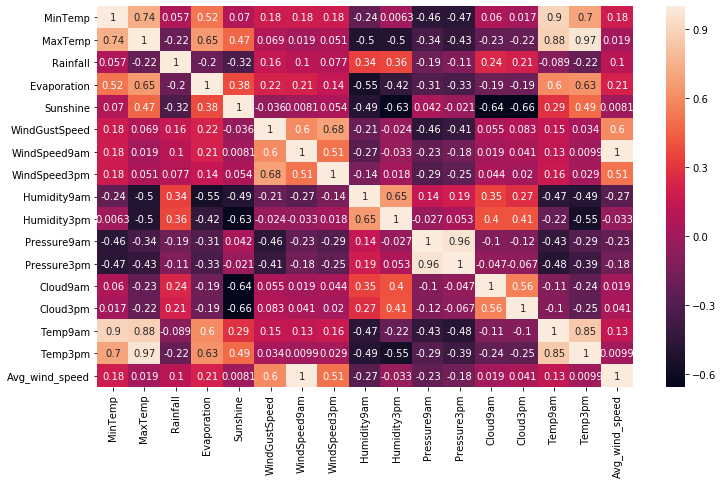

In [314]:
plt.figure(figsize=(12,7))
sns.heatmap(rain_corr.corr(),annot=True)